<a href="https://colab.research.google.com/github/Amanr1996/Airbnb-EDA/blob/main/Airbnb_initial_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns



In [96]:
# Load the Airbnb data into a pandas dataframe
df = pd.read_csv('/content/Airbnb NYC 2019.csv')



In [97]:
# Cerating a copy of Dataset
airbnb_data = df.copy()

In [98]:
# Look into the data.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [99]:
# We need to fill Null values in the table.
## for "name" column.
most_frequent_value = airbnb_data['name'].value_counts().index[0]
airbnb_data['name'].fillna(value = most_frequent_value, inplace = True)

### for "host_name" column.
most_frequent_host = airbnb_data['host_name'].value_counts().index[0]
airbnb_data['host_name'].fillna(value = most_frequent_host, inplace = True)

## for "review_per_month"

Mean_review_per_month = airbnb_data['reviews_per_month'].mean()

airbnb_data['reviews_per_month'].fillna(value = Mean_review_per_month, inplace = True)


In [100]:
## Droping the column we dont need.
airbnb_data.drop(columns = "last_review", axis = 1, inplace = True)

In [101]:
# Look into the data.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [102]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [103]:
airbnb_data.describe ()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [104]:
# Determine the most popular neighborhoods
neighbourhood_counts = airbnb_data['neighbourhood'].value_counts()
top_neighbourhoods = neighbourhood_counts.head(10)
print(top_neighbourhoods)



Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


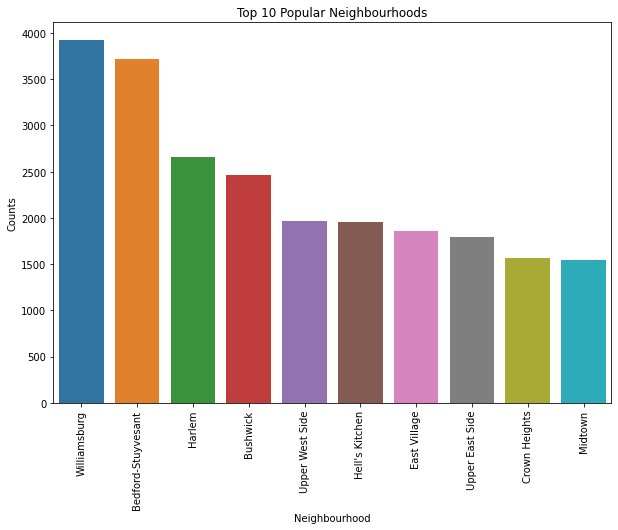

In [105]:
# Plot the top neighbourhoods
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
plt.title('Top 10 Popular Neighbourhoods')
plt.xticks(rotation=90)
plt.show()



In [106]:
# Determine the most popular room types
room_type_counts = airbnb_data['room_type'].value_counts()
print(room_type_counts)


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [ ]:
# Plot the room type counts
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Counts')
plt.title('Room Type Counts')
plt.show()



In [93]:
# Determine the most popular price ranges
Room_price = airbnb_data['price'].value_counts().head(5)
Room_price

100    2051
150    2047
50     1534
60     1458
200    1401
Name: price, dtype: int64

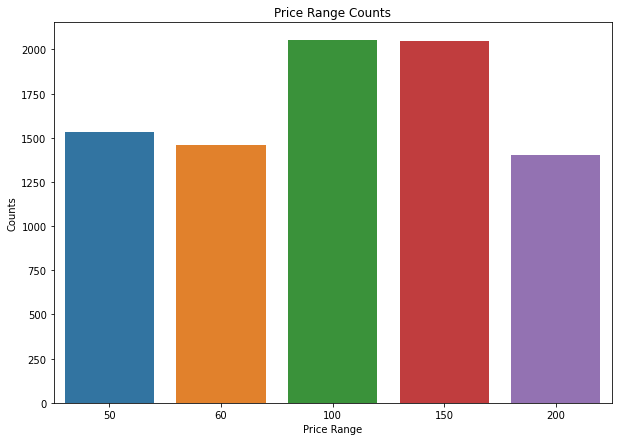

In [109]:
# Plot the price range counts
sns.barplot(x=Room_price.index, y=Room_price)
plt.xlabel('Price Range')
plt.ylabel('Counts')
plt.title('Price Range Counts')
plt.show()

Host analysis: Identify the most active hosts, their listing characteristics, and their impact on revenue to support the development of effective hosting strategies.

In [110]:
# Identify the most active hosts
host_activity = airbnb_data.groupby(['host_id', 'host_name'])['id'].agg(['count']).reset_index()
most_active_hosts = host_activity.sort_values('count', ascending=False).head(10)





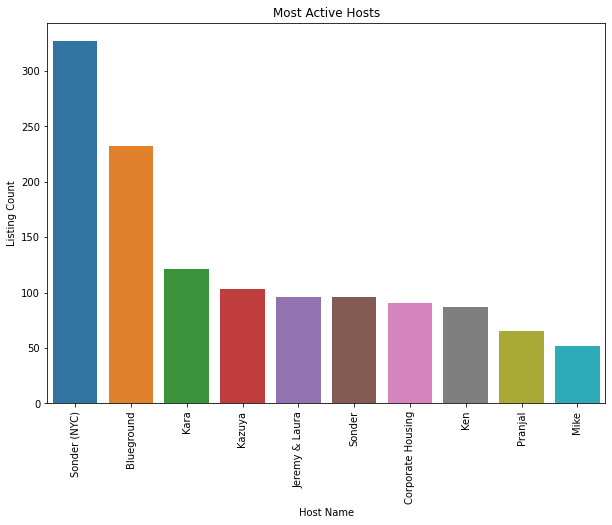

In [111]:
# Plot the most active hosts
sns.barplot(x=most_active_hosts['host_name'], y=most_active_hosts['count'])
plt.xlabel('Host Name')
plt.ylabel('Listing Count')
plt.title('Most Active Hosts')
plt.xticks(rotation=90)
plt.show()



In [87]:
# Analyze the listing characteristics of the most active hosts
most_active_hosts_listings = airbnb_data[airbnb_data['host_id'].isin(most_active_hosts['host_id'])]
listing_characteristics = most_active_hosts_listings.groupby(['host_id', 'room_type'])['price'].agg(['mean', 'count']).reset_index()

listing_characteristics.rename(columns = {'mean': 'Avg_price'}, inplace = True)

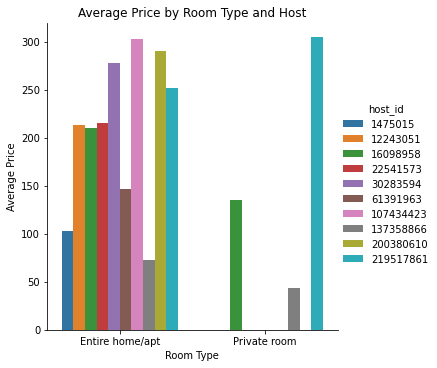

In [112]:
# Plot the average price by room type and host
sns.catplot(x="room_type", y="Avg_price", hue="host_id", kind="bar", data=listing_characteristics)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type and Host')
plt.show()



In [114]:
# Analyze the impact of the most active hosts on revenue
host_revenue = most_active_hosts_listings.groupby(['host_id'])['price'].agg(['sum']).reset_index()

host_revenue


,host_id,sum
0,1475015,5360
1,12243051,20451
2,16098958,20060
3,22541573,18743
4,30283594,33581
5,61391963,13308
6,107434423,70331
7,137358866,4514
8,200380610,18865
9,219517861,82795


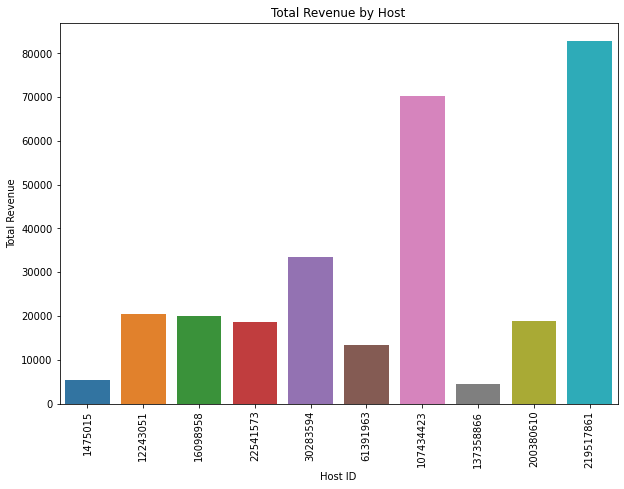

In [115]:
# Plot the total revenue by host
sns.barplot(x=host_revenue['host_id'], y=host_revenue['sum'])
plt.xlabel('Host ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Host')
plt.xticks(rotation=90)
plt.show()

# Revenue optimization: Analyze the pricing trends, seasonality patterns, and availability data to determine the optimal pricing strategy for increasing revenue.


In [118]:
# Analyze the pricing trends
price_trends = airbnb_data.groupby(['neighbourhood_group', 'room_type'])['price'].agg(['mean']).reset_index()

price_trends


,neighbourhood_group,room_type,mean
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


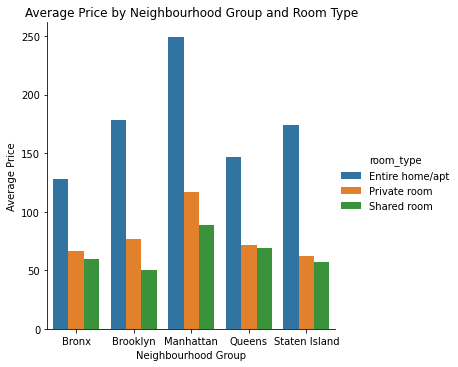

In [117]:
# Plot the average price by neighbourhood group and room type
sns.catplot(x="neighbourhood_group", y="mean", hue="room_type", kind="bar", data=price_trends)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group and Room Type')
plt.show()



In [120]:
# Analyze the availability data
availability_data = airbnb_data.groupby(['neighbourhood_group', 'room_type'])['availability_365'].agg(['mean']).reset_index()



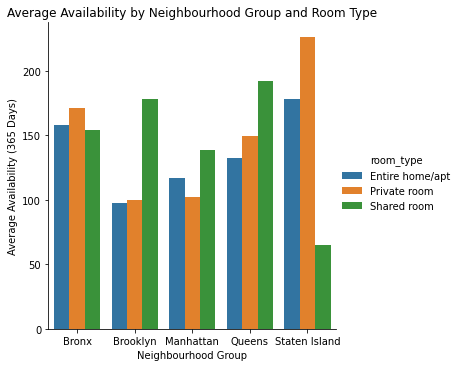

In [121]:
# Plot the average availability by neighbourhood group and room type
sns.catplot(x="neighbourhood_group", y="mean", hue="room_type", kind="bar", data=availability_data)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (365 Days)')
plt.title('Average Availability by Neighbourhood Group and Room Type')
plt.show()

Customer behavior: Analyze customer behavior patterns such as booking frequency, preferred room types, and minimum night stays to improve the customer experience.

In [122]:
# Analyze booking frequency
booking_frequency = airbnb_data.groupby(['room_type', 'neighbourhood'])['minimum_nights'].agg(['count']).reset_index()



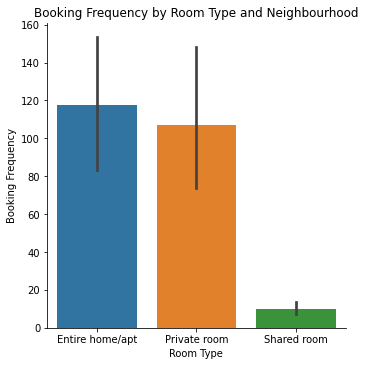

In [ ]:
# Plot the booking frequency by room type and neighbourhood
sns.catplot(x="room_type", y="count", kind="bar", data=booking_frequency)
plt.xlabel('Room Type')
plt.ylabel('Booking Frequency')
plt.title('Booking Frequency by Room Type and Neighbourhood')
plt.show()



In [ ]:
# Analyze preferred room types
room_type_counts = airbnb_data['room_type'].value_counts()



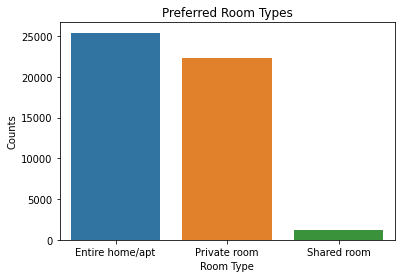

In [ ]:
# Plot the preferred room types
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Counts')
plt.title('Preferred Room Types')
plt.show()



In [128]:
# Analyze minimum night stays
minimum_nights = airbnb_data['minimum_nights'].value_counts().sort_index().head()

minimum_nights


1    12720
2    11696
3     7999
4     3303
5     3034
Name: minimum_nights, dtype: int64

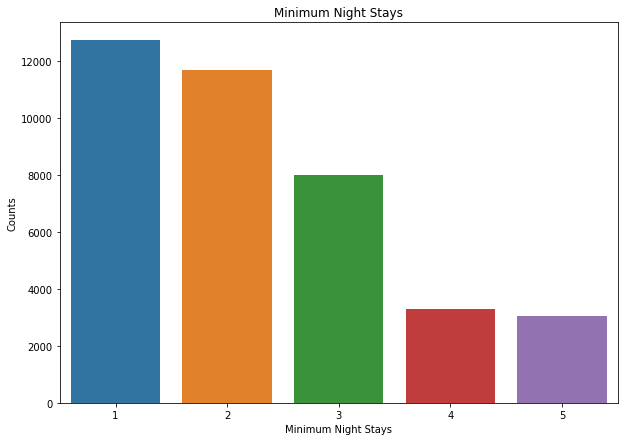

In [129]:
# Plot the minimum night stays
sns.barplot(x=minimum_nights.index, y=minimum_nights.values)
plt.xlabel('Minimum Night Stays')
plt.ylabel('Counts')
plt.title('Minimum Night Stays')
plt.show()